In [9]:
# imports 
from path import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
#import statsapi
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# TensorFlow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
PFL = pd.read_csv("C:/Users/GeorgeSmith/Documents/Syracuse/IST 718/Final Project/PFL_Rolling_DB2.csv")

In [3]:
PFL2 = PFL.dropna()

In [4]:
PFL2.head()

,Date,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,...,Opp Outer Zone,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win
5,6/7/2018 0:00,Steven Siler,0,1,1,2,0,1,13,13,...,0.0,0.000000,31.000000,0.000000,-0.275287,-0.500000,-1.000000,1100,1,1
8,6/7/2018 0:00,Marcos Galvao,9,15,3,6,6,6,4,7,...,0.0,0.000000,20.666667,-0.333333,0.045777,0.100000,0.428571,110,0,0
9,6/7/2018 0:00,Nazareno Malegarie,3,6,9,15,4,7,6,6,...,0.0,20.666667,0.000000,0.333333,-0.045777,-0.100000,-0.428571,-140,1,1
11,6/7/2018 0:00,Valdrin Istrefi,3,5,4,6,2,7,71,92,...,0.0,0.000000,0.000000,0.000000,-0.232020,-0.066667,-0.486025,310,0,0
12,6/7/2018 0:00,Alex Nicholson,6,6,11,20,0,0,0,0,...,0.0,0.000000,24.000000,0.000000,-0.062058,0.450000,0.000000,-135,1,1


In [5]:
# Create x data set to train set and split 
X = PFL2.copy()
X.drop(["Total Wins"], axis=1, inplace=True)
X.drop(["Win"], axis=1, inplace=True)
X.drop(["Date"], axis=1, inplace=True)
X.drop(["Fighter"], axis=1, inplace=True)
X.drop(["Height"], axis=1, inplace=True)
X.head()

,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,Total Strikes Attempts,...,Opp Inner Zone,Outer Zone,Opp Outer Zone,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds
5,0,1,1,2,0,1,13,13,7,29,...,0.0,0.0,0.0,0.000000,31.000000,0.000000,-0.275287,-0.500000,-1.000000,1100
8,9,15,3,6,6,6,4,7,61,140,...,0.0,0.0,0.0,0.000000,20.666667,-0.333333,0.045777,0.100000,0.428571,110
9,3,6,9,15,4,7,6,6,62,159,...,0.0,0.0,0.0,20.666667,0.000000,0.333333,-0.045777,-0.100000,-0.428571,-140
11,3,5,4,6,2,7,71,92,11,23,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.232020,-0.066667,-0.486025,310
12,6,6,11,20,0,0,0,0,17,67,...,0.0,0.0,0.0,0.000000,24.000000,0.000000,-0.062058,0.450000,0.000000,-135


In [6]:
# Create y data set to train set and split 
y = PFL2["Win"]

In [7]:
# train test and split and scale the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
 # Define the model - shallow neural net w/ TensorFlow 
number_hidden_nodes = 8
number_input_features = 52

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [13]:
 # Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train_scaled, y, validation_split=0.3, epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 17ms/step - loss: 0.7010 - mse: 0.7010 - val_loss: 0.5593 - val_mse: 0.5593
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.5112 - val_mse: 0.5112
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5312 - mse: 0.5312 - val_loss: 0.4850 - val_mse: 0.4850
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4802 - mse: 0.4802 - val_loss: 0.4715 - val_mse: 0.4715
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.4571 - val_mse: 0.4571
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4148 - mse: 0.4148 - val_loss: 0.4441 - val_mse: 0.4441
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.4357 - val_mse: 0.4357
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3737 - mse: 0.3737 - va

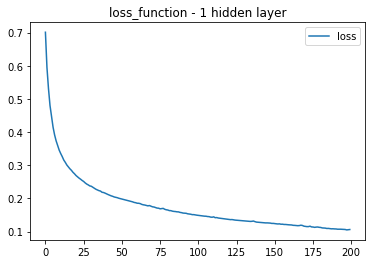

In [14]:
 # Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [15]:
 # Define the model - deep neural net
number_input_features = 52
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [16]:
 # Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X_train_scaled, y, validation_split=0.3, epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 14ms/step - loss: 0.4237 - mse: 0.4237 - val_loss: 0.4339 - val_mse: 0.4339
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4011 - mse: 0.4011 - val_loss: 0.4265 - val_mse: 0.4265
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.4205 - val_mse: 0.4205
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3635 - mse: 0.3635 - val_loss: 0.4185 - val_mse: 0.4185
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3452 - mse: 0.3452 - val_loss: 0.4162 - val_mse: 0.4162
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3289 - mse: 0.3289 - val_loss: 0.4139 - val_mse: 0.4139
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3145 - mse: 0.3145 - val_loss: 0.4125 - val_mse: 0.4125
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3040 - mse: 0.3040 - va

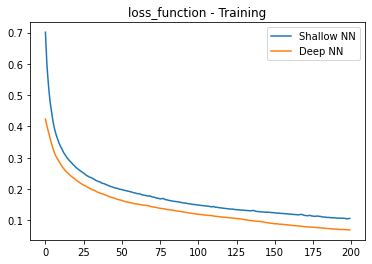

In [22]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["Shallow NN", "Deep NN"])
plt.show()

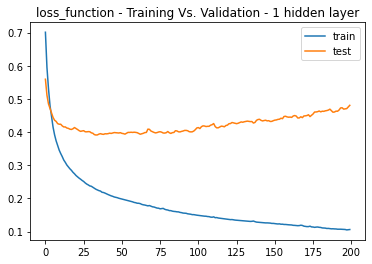

In [18]:
 # Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

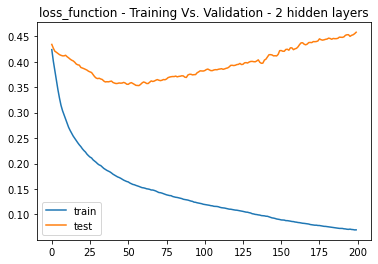

In [19]:
 # Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [21]:
model_1.summary()

AttributeError: 'History' object has no attribute 'summary'